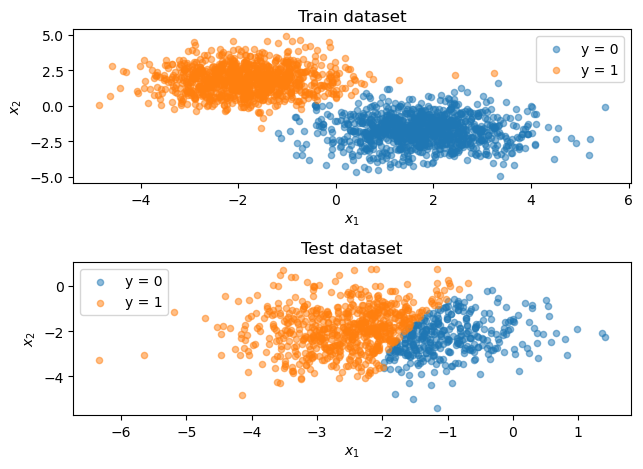

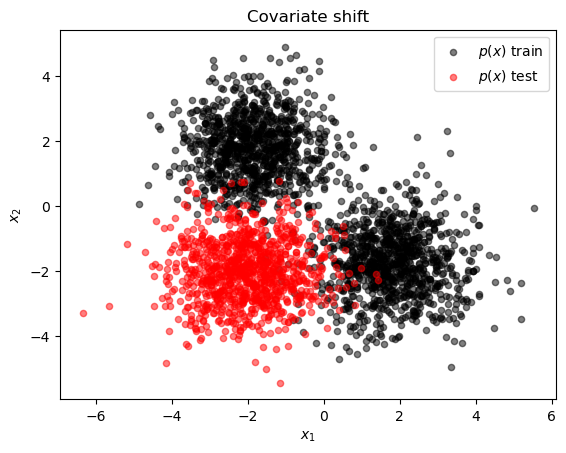

In [10]:
import torch
import torch as t
import matplotlib.pyplot as plt
%matplotlib inline

t.manual_seed(0)

# Make a ground truth binary classification function for 2-d inputs.
def ground_truth(x):
  return (t.square(x[:,0] - 4.) + t.square(x[:,1] + 4) > 36).int()


# Generate a train and test dataset using the ground truth classifier and random values for x.
def gen_train_data(N=1000, c=1.8):
    x = t.cat([torch.randn(N, 2) + t.tensor([c,-c]), torch.randn(N, 2) + t.tensor([-c,c])])
    y = ground_truth(x)
    return x,y
x_train, y_train = gen_train_data()
x_val, y_val = gen_train_data()

N = 1000
x_test = torch.randn(N, 2) + t.tensor([-2,-2])
y_test = ground_truth(x_test)

# viz datasets
fig, axs = plt.subplots(2)
ax = axs[0]
for label in [0, 1]:
    ax.scatter(x_train[y_train==label, 0],x_train[y_train==label, 1], s=20, alpha=0.5, label="y = " + str(label))
ax.legend()
ax.set_title("Train dataset")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax = axs[1]
for label in [0, 1]:
    ax.scatter(x_test[y_test==label, 0],x_test[y_test==label, 1], s=20, alpha=0.5, label="y = " + str(label))
ax.legend()
ax.set_title("Test dataset")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
fig.tight_layout()


fig, ax = plt.subplots()

ax.scatter(x_train[:, 0],x_train[:, 1], s=20, c='black', alpha=0.5, label="$p(x)$ train")
ax.scatter(x_test[:, 0],x_test[:, 1], s=20, c='red', alpha=0.5, label="$p(x)$ test")
ax.legend()
ax.set_title("Covariate shift")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

t.save([x_train, y_train, x_val, y_val, x_test, y_test], 'hw3_data_new.pt')